Social Network Analysis - Part 3 - Example 7
(Community Detection)

In this exercise, we will analyze the "Karate Club" network (https://en.wikipedia.org/wiki/Zachary%27s_karate_club).

We will use different libraries for 3 different community detection methods, namely:
1. Louvain (https://en.wikipedia.org/wiki/Louvain_method)
2. Girvan-Newman (https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm)
3. Hierarchical Clustering (https://en.wikipedia.org/wiki/Hierarchical_clustering)


- Ref (nice article): https://towardsdatascience.com/graph-algorithms-part-2-dce0b2734a1d
- Ref (Python workbook) https://github.com/maelfabien/Machine_Learning_Tutorials/blob/master/3-MachineLearning/GraphMining/Graph_Analysis.ipynb

In [1]:
import numpy as np
import random

from IPython.display import Image
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import networkx as nx
from networkx.algorithms import community

In [2]:
# Node2Vec
from node2vec import Node2Vec

%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile

In [3]:
'''
We'll use the "Karate Club" graph integrated in networkx.
It represents the relations of members of a Karate Club.

However, due to a lack a agreement of the founders of the club, 
the club has recently been splitted in two.

We'll try to illustrate this event with graphs.
'''

# Load a sample network "Karate"
G_karate = nx.karate_club_graph()

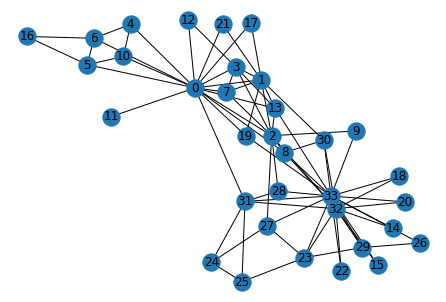

In [4]:
# Let's draw the graph
pos = nx.spring_layout(G_karate) #similar to FORCE ATLAS Function 
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [5]:
# Let's describe the graph

# Network size (# of nodes)
n = G_karate.number_of_nodes()
print("Size of graph: ", n)

Size of graph:  34


In [6]:
# Degree Centrality of each node
G_karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [7]:
degree_sequence = list(G_karate.degree())
degree_sequence

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 3),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 5),
 (24, 3),
 (25, 3),
 (26, 2),
 (27, 4),
 (28, 3),
 (29, 4),
 (30, 4),
 (31, 6),
 (32, 12),
 (33, 17)]

In [8]:
nb_nodes = n
nb_arr = len(G_karate.edges())

avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])

max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])



print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))

print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))

print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


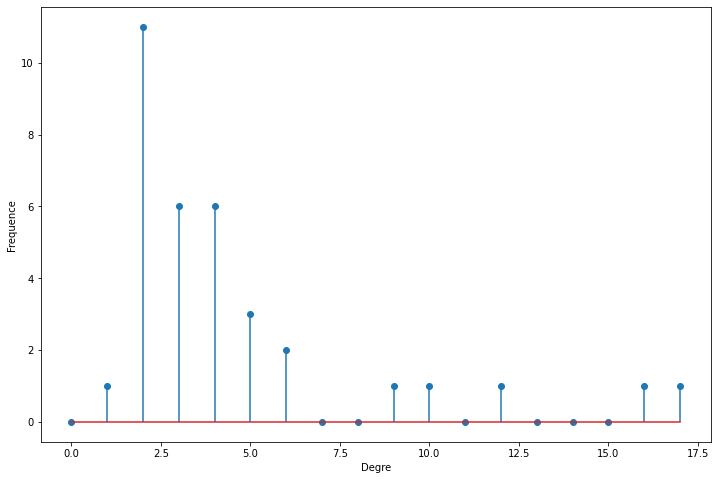

In [9]:
# More visually, we can plot the histogram of the sequence of degrees
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')

plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

In [10]:
# Node-level clustering coefficient
# Local Clustering Coefficients
list(nx.clustering(G_karate).values())

[0.15,
 0.3333333333333333,
 0.24444444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.5,
 0.5,
 1.0,
 0.5,
 0,
 0.6666666666666666,
 0,
 1.0,
 0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 0.4,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.16666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.5,
 0.2,
 0.19696969696969696,
 0.11029411764705882]

# Clustering Coefficient
In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes

Ref: https://en.wikipedia.org/wiki/Clustering_coefficient

In [11]:
# Global Clustering Coefficient
print("Global Clustering Coefficient : " + str(np.mean(list(nx.clustering(G_karate).values()))))

# You can also calculate Clustering Coefficient for each community.
# For instance, identify the largest community ('giant' cluster) in a network.
# And then calculate the clustering coefficient for that giant cluster.

Global Clustering Coefficient : 0.5706384782076823


In [12]:
# Returns shortest path between each node
nx.shortest_path(G_karate)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  17: [0, 17],
  19: [0, 19],
  21: [0, 21],
  31: [0, 31],
  30: [0, 1, 30],
  9: [0, 2, 9],
  27: [0, 2, 27],
  28: [0, 2, 28],
  32: [0, 2, 32],
  16: [0, 5, 16],
  33: [0, 8, 33],
  24: [0, 31, 24],
  25: [0, 31, 25],
  23: [0, 2, 27, 23],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  18: [0, 2, 32, 18],
  20: [0, 2, 32, 20],
  22: [0, 2, 32, 22],
  29: [0, 2, 32, 29],
  26: [0, 8, 33, 26]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  7: [1, 7],
  13: [1, 13],
  17: [1, 17],
  19: [1, 19],
  21: [1, 21],
  30: [1, 30],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  8: [1, 0, 8],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  31: [1, 0, 31],
  9: [1, 2, 9],
  27: [1, 2, 27],
  28: [1, 2, 28],
  32: [1, 2, 32],
  33: [1, 13, 33],
  16: [1, 0, 5, 16],
  24: [1, 0, 31, 24],
  25: [1, 0, 31,

In [13]:
# Returns shortest path length between each node
list(nx.all_pairs_shortest_path_length(G_karate))

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   31: 1,
   9: 2,
   16: 2,
   24: 2,
   25: 2,
   27: 2,
   28: 2,
   30: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   26: 3,
   29: 3}),
 (1,
  {1: 0,
   0: 1,
   2: 1,
   3: 1,
   7: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   30: 1,
   4: 2,
   5: 2,
   6: 2,
   8: 2,
   9: 2,
   10: 2,
   11: 2,
   12: 2,
   27: 2,
   28: 2,
   31: 2,
   32: 2,
   33: 2,
   14: 3,
   15: 3,
   16: 3,
   18: 3,
   20: 3,
   22: 3,
   23: 3,
   24: 3,
   25: 3,
   26: 3,
   29: 3}),
 (2,
  {2: 0,
   0: 1,
   1: 1,
   32: 1,
   3: 1,
   7: 1,
   8: 1,
   9: 1,
   13: 1,
   27: 1,
   28: 1,
   4: 2,
   5: 2,
   6: 2,
   10: 2,
   11: 2,
   12: 2,
   14: 2,
   15: 2,
   17: 2,
   18: 2,
   19: 2,
   20: 2,
   21: 2,
   22: 2,
   23: 2,
   24: 2,
   29: 2,
   30: 2,
   31: 2,
   33: 2,
   16: 3,
   25: 3,
 

# Find communities (Algorithm: Louvain)

In [1]:
!pip install python-louvain

In [14]:
'''
You may need to install a new package "python-louvain"

pip install python-louvain
'''

############## Community Detection ##############
import community

In [15]:
# Find communities (Algorithm: Louvain)
partition = community.best_partition(G_karate)  

In [16]:
# Let's check out the communities
partition #left hand side Nodes : Right hand side community number

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 3,
 9: 3,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 1,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 3,
 24: 2,
 25: 2,
 26: 3,
 27: 3,
 28: 2,
 29: 3,
 30: 3,
 31: 2,
 32: 3,
 33: 3}

In [17]:
node_list = list(G_karate.nodes())

for node in node_list:
    print("Node ", node, " is in Cluster ", partition[node])

Node  0  is in Cluster  0
Node  1  is in Cluster  0
Node  2  is in Cluster  0
Node  3  is in Cluster  0
Node  4  is in Cluster  1
Node  5  is in Cluster  1
Node  6  is in Cluster  1
Node  7  is in Cluster  0
Node  8  is in Cluster  3
Node  9  is in Cluster  3
Node  10  is in Cluster  1
Node  11  is in Cluster  0
Node  12  is in Cluster  0
Node  13  is in Cluster  0
Node  14  is in Cluster  3
Node  15  is in Cluster  3
Node  16  is in Cluster  1
Node  17  is in Cluster  0
Node  18  is in Cluster  3
Node  19  is in Cluster  0
Node  20  is in Cluster  3
Node  21  is in Cluster  0
Node  22  is in Cluster  3
Node  23  is in Cluster  3
Node  24  is in Cluster  2
Node  25  is in Cluster  2
Node  26  is in Cluster  3
Node  27  is in Cluster  3
Node  28  is in Cluster  2
Node  29  is in Cluster  3
Node  30  is in Cluster  3
Node  31  is in Cluster  2
Node  32  is in Cluster  3
Node  33  is in Cluster  3


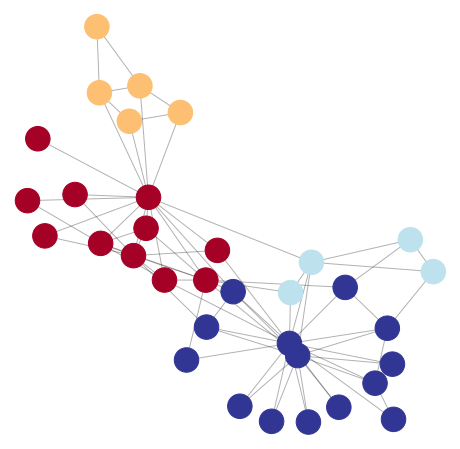

In [18]:
# Let's graph the communities

pos = nx.spring_layout(G_karate)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')

nx.draw_networkx_nodes(G_karate, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.3)

# plt.show(G_karate)

plt.show()

# Find communities (Algorithm: Girvan Newman)


In [19]:
# Find communities(Algorithm: Girvan Newman)
from networkx.algorithms import community

k = 1
comp = community.girvan_newman(G_karate)

for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


In [20]:
# See if all communities are connected
nx.is_connected(G_karate)

# If the communities are NOT connected... how will you reach out to ALL nodes?
# Won't you have to find a starting node in each community & start spreading infection?

True

- If the communities are NOT connected... how will you reach out to ALL nodes?
- Won't you have to find a starting node in each community & start spreading infection?

In [21]:
# Suppose we have one community consisting of the following nodes:
community1 = [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
# Note that, instead of hard-coding the nodes for community1
# You could programmatically retrieve the nodes from the Community Detection output


# Suppose we have a 2nd community consisting of:
community2 = [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
# Note that, instead of hard-coding the nodes for community2
# You could programmatically retrieve the nodes from the Community Detection output

In [22]:
# We can extract out a sub-graph given a list of nodes

# Community 1
community1_subgraph = G_karate.subgraph(community1)

# Community 2
community2_subgraph = G_karate.subgraph(community2)

# Let's check out all the edges
print("============ Community 1 - Edges ===========")
print( community1_subgraph.edges() )

print("============ Community 2 - Edges ===========")
print( community2_subgraph.edges() )

============ Community 1 - Edges ===========
[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16)]
============ Community 2 - Edges ===========
[(2, 8), (2, 9), (2, 27), (2, 28), (2, 32), (8, 30), (8, 32), (8, 33), (9, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


# Find communities (Algorithm: Hierarchical Clustering)

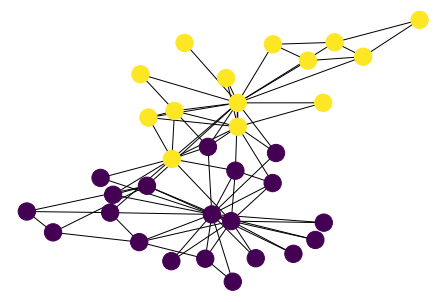

In [23]:
# AND here's yet another community detection algorithm --> Hierarchical Clustering

# Find communities(Algorithm: Hierarchical Clustering)
# Before applying hierachical clustering, we need to define the matrix of distances between each node.

# distances[i, j] is the length of the shortest path between i and j
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

# Perform clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed').fit_predict(distances)

# Draw the graph
nx.draw(G_karate, node_color = clustering)

Below, we show you useful node-level centrality measures.

It is similar to closeness centrality, which is a measure of proximity.
High closeness centrality nodes can reach out to the rest of the network with the least number of links.
Hence, they can spread epidemics/rumors/information very fast throughout the network.

Eigenvector Centrality is a node-level influence measure.
A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

Given two individuals Alice and Bob, each with 10 degree centrality value:
Alice could have a much higher eigenvector centrality than Bob because -
1) Each of Alice's 10 friends... has 10 friends
2) Each of Bob's 10 friends only has 1 friends each

In [24]:
# Let's use the Karate Club network to calculate
# 1) Degree centrality
# 2) Closeness centrality
# 3) Betweenness centrality
# 4) Eigenvector centrality

c_degree = nx.degree_centrality(G_karate)
c_closeness = nx.closeness_centrality(G_karate)
c_betweenness = nx.betweenness_centrality(G_karate)
c_eigenvector = nx.eigenvector_centrality(G_karate)

c_degree = list(c_degree.values())
c_closeness = list(c_closeness.values())
c_betweenness = list(c_betweenness.values())
c_eigenvector = list(c_eigenvector.values())

Text(0.5, 1.0, 'Betweenness Centrality')

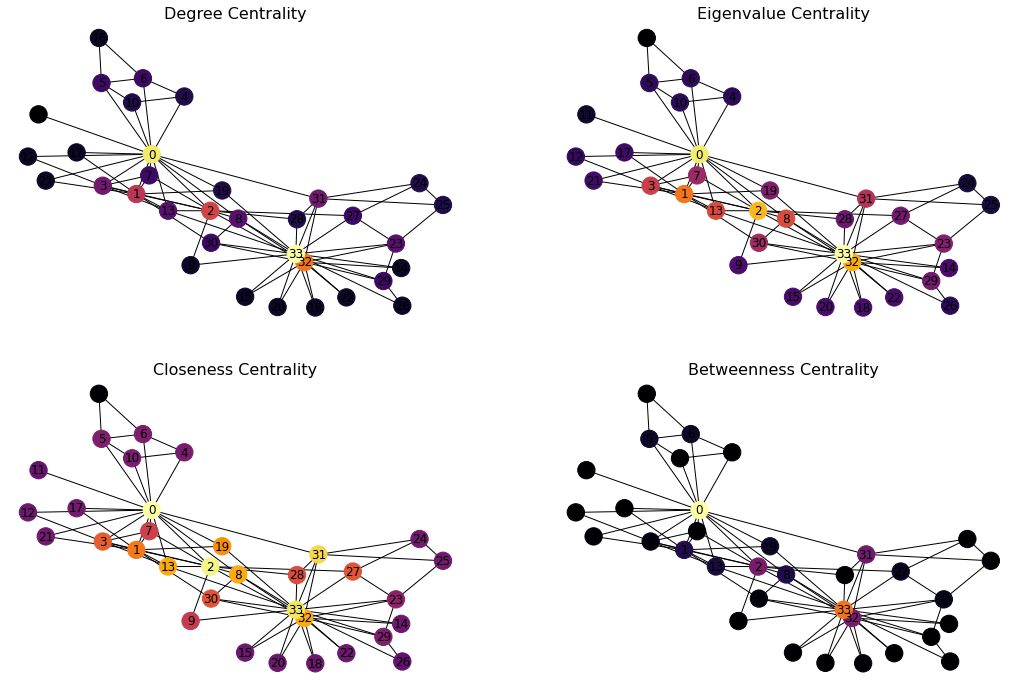

In [25]:
plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Closeness Centrality', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)